In [1]:
import numpy as np
import pandas as pd

## Q1

In [2]:
admissions_surg = pd.read_csv('admissions_surg.csv')
admissions_med = pd.read_csv('admissions_med.csv')
imaging = pd.read_csv('img.csv')

In [3]:
admissions_surg.info()#diff col names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1195 non-null   int64  
 1   ADMISSION.DATE        1195 non-null   object 
 2   ADMISSION.TIME        1195 non-null   object 
 3   DISCHARGE.DATE        1195 non-null   object 
 4   DISCHARGE.TIME        1053 non-null   object 
 5   DEPARTMENT            1195 non-null   object 
 6   GENDER                1195 non-null   object 
 7   AGE                   1129 non-null   float64
 8   MAIN.DIAGNOSIS.ICD10  1195 non-null   object 
 9   MAIN.DIAGNOSIS.NAME   1107 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 93.5+ KB


In [4]:
admissions_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2305 entries, 0 to 2304
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    2305 non-null   int64  
 1   admission_date        2305 non-null   object 
 2   admission_time        2305 non-null   object 
 3   discharge_date        2305 non-null   object 
 4   discharge_time        2047 non-null   object 
 5   department            2305 non-null   object 
 6   gender                2305 non-null   object 
 7   age                   2178 non-null   float64
 8   main_diagnosis_icd10  2305 non-null   object 
 9   main_diagnosis_name   2113 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 180.2+ KB


In [5]:
imaging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 5000 non-null   int64 
 1   test_name          5000 non-null   object
 2   ordered_date_time  3302 non-null   object
 3   performed_date     5000 non-null   object
 4   performed_time     5000 non-null   object
 5   technician_name    5000 non-null   object
 6   brief_report       5000 non-null   object
dtypes: int64(1), object(6)
memory usage: 273.6+ KB


In [6]:
admissions_surg = (admissions_surg.rename({'ADMISSION.DATE':'admission_date',
                                           'ADMISSION.TIME':'admission_time',
                                           'DISCHARGE.DATE':'discharge_date',
                                           'DISCHARGE.TIME':'discharge_time',
                                           'DEPARTMENT':'department',
                                           'GENDER':'gender',
                                           'AGE':'age',
                                           'MAIN.DIAGNOSIS.ICD10':'main_diagnosis_icd10',
                                          'MAIN.DIAGNOSIS.NAME':'main_diagnosis_name'}, axis='columns'))

In [53]:
admissions_surg.append(admissions_med, ignore_index=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    3500 non-null   int64  
 1   admission_date        3500 non-null   object 
 2   admission_time        3500 non-null   object 
 3   discharge_date        3500 non-null   object 
 4   discharge_time        3100 non-null   object 
 5   department            3500 non-null   object 
 6   gender                3500 non-null   object 
 7   age                   3307 non-null   float64
 8   main_diagnosis_icd10  3500 non-null   object 
 9   main_diagnosis_name   3220 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 273.6+ KB


In [208]:
admissions_img = (imaging.merge(admissions_surg.append(admissions_med, ignore_index=True), 
                                how='left', left_on='ID', right_on='ID'))

In [56]:
admissions_img.head()

,ID,test_name,ordered_date_time,performed_date,performed_time,technician_name,brief_report,admission_date,admission_time,discharge_date,discharge_time,department,gender,age,main_diagnosis_icd10,main_diagnosis_name
0,1064,US,NaN,1985-12-17,10:27,Trevon Hopson,No significant abnormality,1985-10-19,04:27,1986-01-01,NaN,General Internal Medicine,M,63.0,N830,Ovarian cyst
1,1064,US PELVIS,NaN,1985-12-02,11:40,Claire Melko,Indication: normal,1985-10-19,04:27,1986-01-01,NaN,General Internal Medicine,M,63.0,N830,Ovarian cyst
2,1066,Abdomen CT,NaN,1990-08-05,12:26,Ladonna Mcallister,Indication: Normal,1990-06-26,21:06,1990-09-03,21:03,General Internal Medicine,F,63.0,N410,Inflammatory conditions of male genital organs
3,1068,US,NaN,1998-03-24,16:15,claire melko,Indication: Normal,1998-02-01,07:02,1998-03-31,07:17,General Surgery,M,NaN,E0800,Diabetes mellitus with complications
4,1074,CT neck + head,NaN,1994-11-05,01:36,Lorena Burciaga,Normal,1994-06-13,06:36,1994-12-22,07:21,General Internal Medicine,F,51.0,K640,Hemorrhoids


In [211]:
admissions_img['admission_date'] = pd.to_datetime(admissions_img['admission_date'])
admissions_img['discharge_date'] = pd.to_datetime(admissions_img['discharge_date'])

In [212]:
admissions_img['length_of_stay'] = admissions_img['discharge_date']-admissions_img['admission_date']

In [213]:
admissions_img['length_of_stay'] = admissions_img['length_of_stay'].dt.days

In [214]:
admissions_img.groupby('department').mean()['length_of_stay']

department
Addiction Services           100.519810
General Internal Medicine     98.301965
General Surgery              100.968137
Obstetrics                   104.809816
Oncology                     102.879213
Palliative Care               96.324528
Name: length_of_stay, dtype: float64

In [81]:
imaging.columns

Index(['ID', 'test_name', 'ordered_date_time', 'performed_date',
       'performed_time', 'technician_name', 'brief_report'],
      dtype='object')

In [84]:
imaging['performed_date'] = pd.to_datetime(imaging['performed_date'])

In [101]:
q3_df = imaging.groupby('test_name').agg({'performed_date': [np.min]})

In [106]:
q4_df = admissions_img.dropna(thresh = 2)

In [107]:
percent_missing = q4_df.isnull().sum() * 100 / len(q4_df)

In [110]:
percent_missing[percent_missing > 0]

ordered_date_time      33.96
discharge_time         11.48
age                     5.98
main_diagnosis_name     8.18
dtype: float64

In [121]:
imaging.isnull().sum()*100/len(imaging)
#no missing test_name or technician_name

ID                    0.00
test_name             0.00
ordered_date_time    33.96
performed_date        0.00
performed_time        0.00
technician_name       0.00
brief_report          0.00
dtype: float64

In [127]:
admissions_img['age'] = admissions_img['age'].fillna(admissions_img['age'].mean())

In [128]:
q5_df = admissions_img

In [130]:
print('The average age for the q5_df is {} yrs.'.format(q5_df['age'].mean()))

The average age for the q5_df is 56.873431184854205 yrs.


## Q6(a)

In [201]:
img_mapper = pd.DataFrame(imaging['test_name'].value_counts().sort_values(ascending=False)).reset_index()

In [202]:
img_mapper = img_mapper.rename({'index':'raw_test_name','test_name':'frequency'}, axis= 'columns')

## Q6(b)

In [203]:
img_mapper['mapped_test'] = 'Others'
img_mapper.loc[img_mapper['raw_test_name'].str.contains('US|Ultrasound', case=False), 'mapped_test'] = 'US'
img_mapper.loc[img_mapper['raw_test_name'].str.contains('CT', case=False), 'mapped_test'] = 'CT'

## Q6(c)

In [205]:
img_mapper['mapped_bodypart'] = 'Others'
img_mapper.loc[img_mapper['raw_test_name'].str.contains('neck|head', case=False), 'mapped_bodypart'] = 'Neck/Head'
img_mapper.loc[img_mapper['raw_test_name'].str.contains('abdomen|pelvis', case=False), 'mapped_bodypart'] = 'Abdomen/Pelvis'

In [206]:
img_mapper

,raw_test_name,frequency,mapped_test,mapped_bodypart
0,US,680,US,Others
1,CT,511,CT,Others
2,Ultrasound,441,US,Others
3,ct neck and head,408,CT,Neck/Head
4,US ABDOMEN,396,US,Abdomen/Pelvis
5,CT neck + head,385,CT,Neck/Head
6,ABDOMEN/PELVIS US,313,US,Abdomen/Pelvis
7,CT - ABDOMEN,310,CT,Abdomen/Pelvis
8,NECK AND HEAD CT,248,CT,Neck/Head
9,Doppler Ultrasound,233,US,Others


## Q7

# Q8

In [215]:
import matplotlib.pyplot as plt

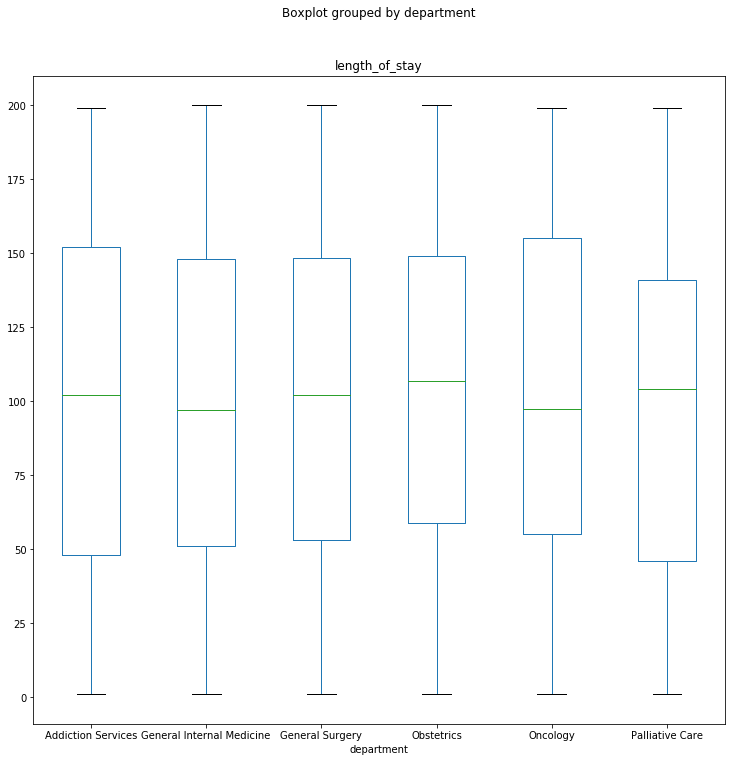

In [228]:
fig, ax = plt.subplots(figsize=(12,12))
admissions_img.boxplot(by='department', column = 'length_of_stay', grid=False, ax=ax)

## Q9

In [263]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [259]:
admissions_img['age'] = admissions_img['age'].fillna(admissions_img['age'].mean())

In [260]:
y = admissions_img['length_of_stay']

In [267]:
X = pd.get_dummies(admissions_img['department'])
X['age'] = admissions_img['age']
X['gender'] = admissions_img['gender'].replace({'F':1,'M':0})

In [271]:
X_train = X[:4000]
X_test = X[-1000:]
y_train = y[:4000]
y_test = y[-1000:]

In [268]:
lr = LinearRegression()

In [272]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [273]:
y_pred = lr.predict(X_test)

In [276]:
print('Coefficients: \n', lr.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 1.83942789 -3.35255598  1.26845565  2.89998791  0.61761521 -3.27293068
  0.00546781  2.14006798]
Mean squared error: 3043.91
Coefficient of determination: -0.00


In [277]:
X

,Addiction Services,General Internal Medicine,General Surgery,Obstetrics,Oncology,Palliative Care,age,gender
0,0,1,0,0,0,0,63.000000,0
1,0,1,0,0,0,0,63.000000,0
2,0,1,0,0,0,0,63.000000,1
3,0,0,1,0,0,0,56.873431,0
4,0,1,0,0,0,0,51.000000,1
...,...,...,...,...,...,...,...,...
4995,0,1,0,0,0,0,95.000000,0
4996,0,1,0,0,0,0,95.000000,0
4997,0,0,0,0,0,1,100.000000,1
4998,0,0,0,0,0,1,100.000000,1
